# Ridge Regression

<span>Basically the exact same thing as linear regression but know with l2 regularization. Creating this notebook to makes sure other know that ridge are regression know the simliraity. Most of this code is carbon copy of my linear regresion notebook.</span>

### Import Preliminaries

In [5]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import modules
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import numpy as np
import pandas as pd 
import seaborn as sns
import statsmodels.api as sm
import warnings

from sklearn.datasets import load_diabetes
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Import models
from sklearn.linear_model import Ridge


# Set pandas options
pd.set_option('max_columns',1000)
pd.set_option('max_rows',100)

# Set plotting options
mpl.rcParams['figure.figsize'] = (9.0, 6.0)

# Set warning options
warnings.filterwarnings('ignore');

### Import Data

In [6]:
# Import diabetet data
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Conduct a train-test-split on the data
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size=0.25)

# View the training dataframe
pd.DataFrame(train_x, columns=diabetes['feature_names']).head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.012648,-0.044642,0.033673,0.033349,0.030078,0.027183,-0.002903,0.008847,0.031193,0.027917
1,0.009016,0.050680,-0.005128,-0.064199,0.069981,0.083863,-0.039719,0.071210,0.039540,0.019633
2,-0.027310,0.050680,-0.055785,0.025315,-0.007073,-0.023547,0.052322,-0.039493,-0.005145,-0.050783
3,0.092564,-0.044642,0.036907,0.021872,-0.024960,-0.016658,0.000779,-0.039493,-0.022512,-0.021788
4,0.001751,-0.044642,-0.070875,-0.022885,-0.001569,-0.001001,0.026550,-0.039493,-0.022512,0.007207


### Target Outcomes

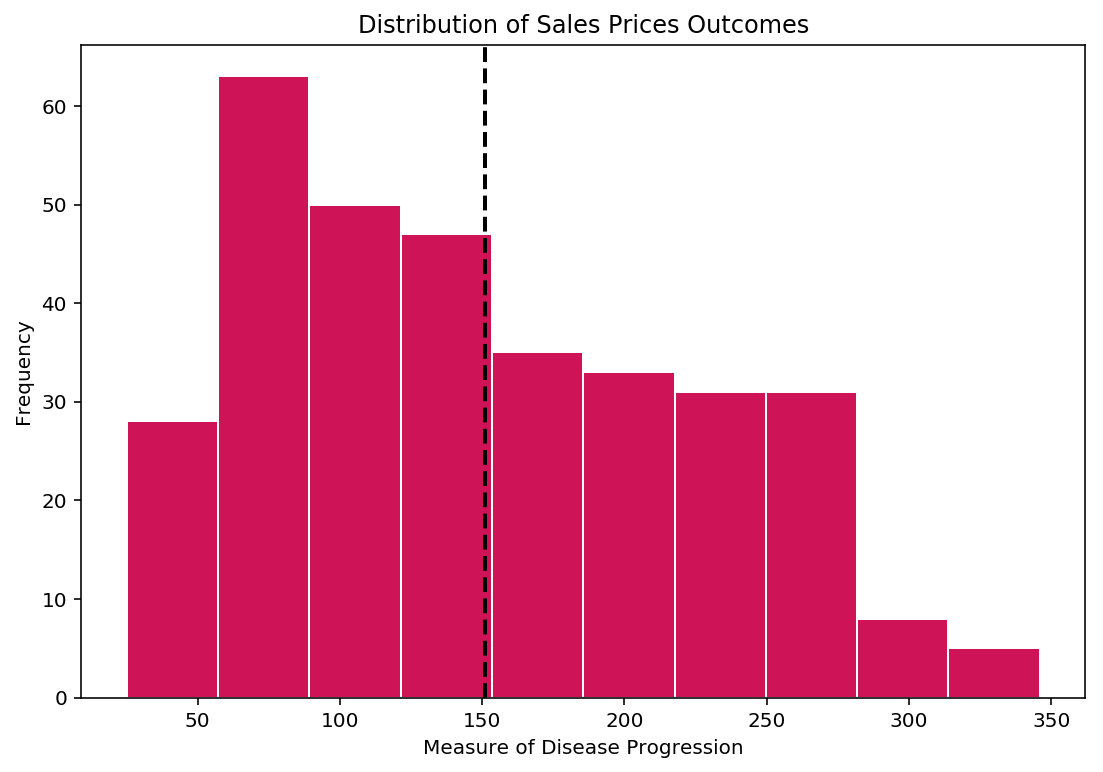

In [7]:
# Plot a histogram of all the home price valuse
pd.Series(train_y).plot.hist(grid=False, color='#CE1356', edgecolor='w',)
plt.title('Distribution of Sales Prices Outcomes')
plt.ylabel('Frequency')
plt.xlabel('Measure of Disease Progression')
plt.axvline(pd.Series(train_y).mean(), color='black', linestyle='dashed', linewidth=2);

### Fit the Model

In [9]:
# Fit a intial linear model
rr_model = Ridge()
rr_model.fit(train_x, train_y);

### Model Evaluation

##### Cross Validatino Score

In [13]:
# Calculate our cross validation score
scores = cross_val_score(rr_model, train_x, train_y, cv=10, 
                scoring='r2').mean()
print(f'Cross Validation Score: {scores.mean():.5f}')

Cross Validation Score: 0.38374


#### Viewing Residuals

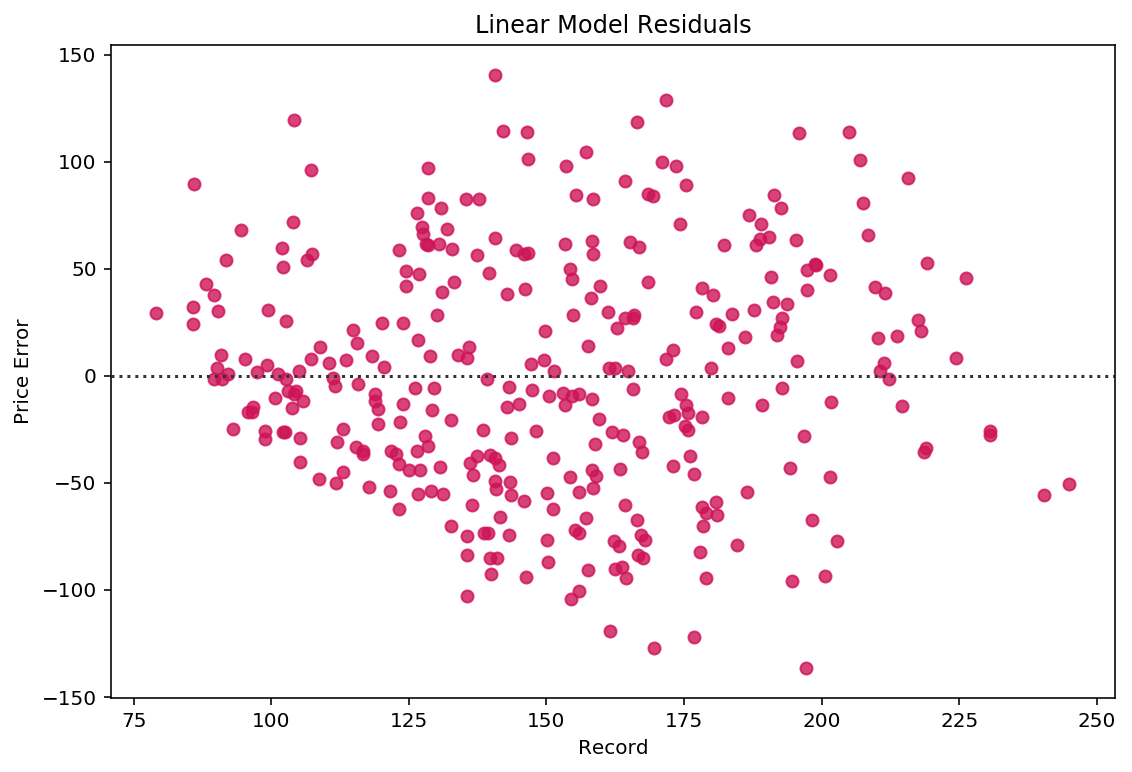

In [10]:
# Plotting residuals from our model
pred_y = rr_model.predict(train_x)
sns.residplot(pred_y, train_y, color='#CE1356');
plt.title('Linear Model Residuals')
plt.ylabel('Price Error')
plt.xlabel('Record');

##### Coefficient Magnitude

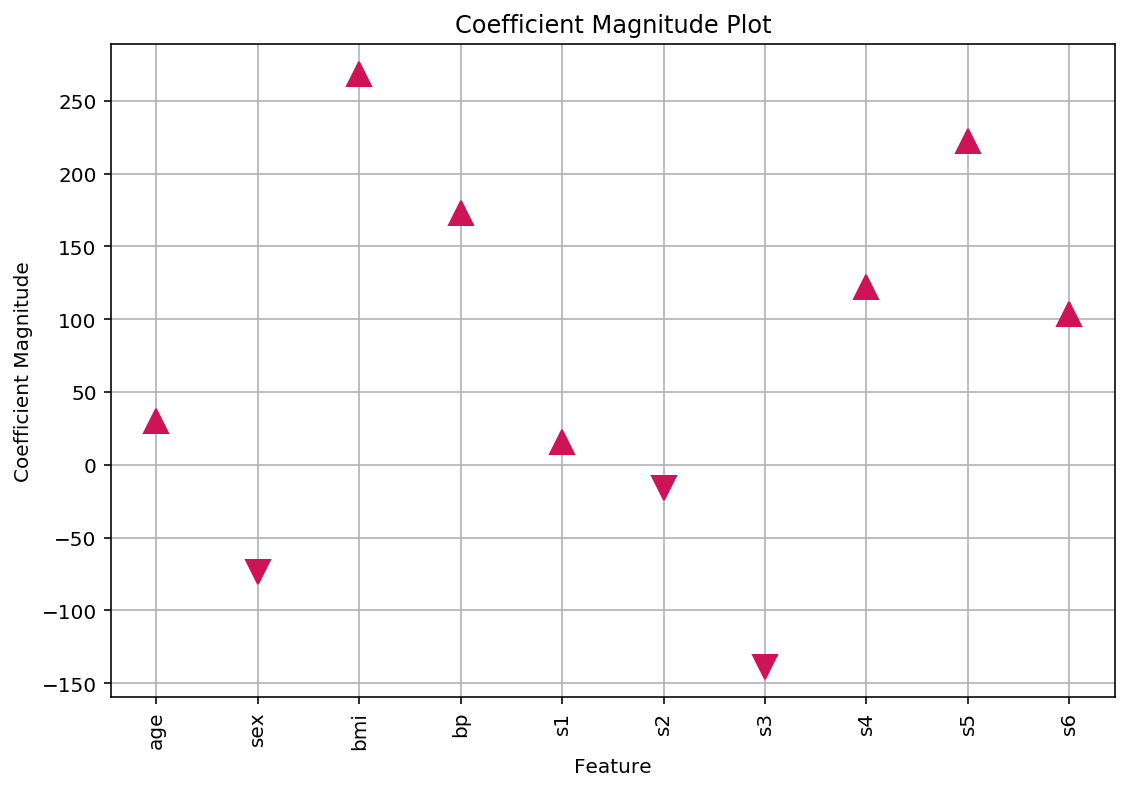

In [12]:
# Plot our coefficient magnitude with variating markes
markers = ['^' if i >=0 else 'v' for i in rr_model.coef_.T]
for i, j in enumerate(markers):
    plt.plot(i,rr_model.coef_[i], marker=markers[i],color='#CE1356', linewidth=0, markersize=12)
    plt.xticks(range(diabetes.data.shape[1]), diabetes.feature_names, rotation=90);
plt.title('Coefficient Magnitude Plot')
plt.ylabel('Coefficient Magnitude')
plt.xlabel('Feature')
plt.grid();

### General Notes

- The simplest and most classic linear model
- The algorithm minimizes the mean squared error
- You can use either Sklearn or Stats Models for the type of problem. Stats models is a bit more informative

Author: Kavi Sekhon